# How to Summarize Data in Python

## Learning Objectives
When exploring data, one of the most important things we can do is summarize it so we can better understand it. A common way to summarize data is by computing aggregations such as mean, median, maximum and minimum. These aggregations or statistical measures (as they are commonly referred to) describe the general and specific characteristics of our data. This is why these types of aggregations are sometimes referred to as **descriptive statistics** or **summary statistics**. The pandas DataFrame provides several methods for computing descriptive statistics. By the end of this tutorial, you will have learned:

+ how to describe a DataFrame
+ how to get simple aggregations
+ how to get group-level aggregations

## How to Describe a DataFrame

In [1]:
import pandas as pd
washers = pd.read_csv("washers.csv")


In [4]:
washers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             261 non-null    int64  
 1   BrandName      261 non-null    object 
 2   ModelNumber    261 non-null    object 
 3   UPC            261 non-null    object 
 4   Configuration  261 non-null    object 
 5   Features       202 non-null    object 
 6   Market         261 non-null    object 
 7   Volume         261 non-null    float64
 8   IMEF           261 non-null    float64
 9   MinimumIMEF    261 non-null    float64
 10  EnergyUse      261 non-null    int64  
 11  IWF            261 non-null    float64
 12  MaximumIWF     261 non-null    float64
 13  WaterUse       261 non-null    int64  
 14  DateAvailable  261 non-null    object 
 15  DateCertified  261 non-null    object 
 16  Countries      261 non-null    object 
 17  MostEfficient  261 non-null    object 
dtypes: float64

## How to get Simple Aggregations
The `describe()` method returns a statistical summary for each of the columns in a DataFrame. It's important to note that the descriptive statistics returned by the `describe()` method depends on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `unique`       | Number of unique non-missing values                   |
| `top`       | Most commonly occuring value   |
| `freq`        | Frequency of the most commonly occuring value                   |


In [6]:
washers.describe()

,ID,Volume,IMEF,MinimumIMEF,EnergyUse,IWF,MaximumIWF,WaterUse
count,2.610000e+02,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2.320802e+06,4.374713,2.456820,1.591341,129.214559,3.598851,6.372797,4632.727969
std,1.574793e+04,0.965866,0.380599,0.274261,43.850620,0.538265,1.845032,1292.693059
min,2.300602e+06,1.900000,2.060000,1.290000,60.000000,2.700000,4.700000,1728.000000
25%,2.310408e+06,4.300000,2.060000,1.290000,99.000000,3.200000,4.700000,3852.000000
50%,2.310499e+06,4.500000,2.380000,1.840000,120.000000,3.600000,4.700000,4429.000000
75%,2.332089e+06,5.000000,2.920000,1.840000,150.000000,4.300000,8.400000,5632.000000
max,2.359624e+06,6.200000,3.100000,1.840000,311.000000,4.300000,8.400000,7827.000000


For numeric columns, the `describe()` method returns the following descriptive statistics:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Number of non-missing values                       |
| `mean`       | Average of the non-missing values                   |
| `std`       | Standard deviation of the values   |
| `min`        | Smallest value                  |
| `25%`         | 25th percentile                       |
| `50%`       | 50th percentile (same as the median)                   |
| `75%`       | 75th percentile   |
| `max`        | Largest value                   |


<Axes: xlabel='BrandName'>

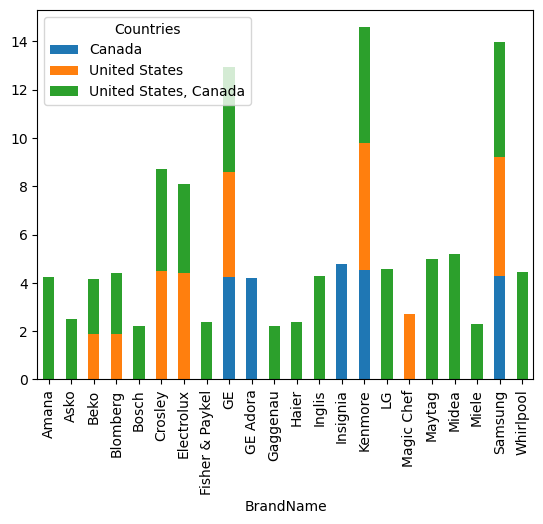

In [8]:
washers.groupby(['BrandName','Countries'])['Volume'].mean().unstack().plot.bar(stacked=True)

In [ ]:
washers[['BrandName']].value_counts()

## How to get Group-level Aggregations

In [10]:
washers.groupby('BrandName')[['Volume']].mean()

,Volume
BrandName,
Amana,4.250000
Asko,2.525000
Beko,2.133333
Blomberg,2.300000
Bosch,2.200000
Crosley,4.400000
Electrolux,3.785714
Fisher & Paykel,2.400000
GE,4.328571


<Axes: xlabel='BrandName'>

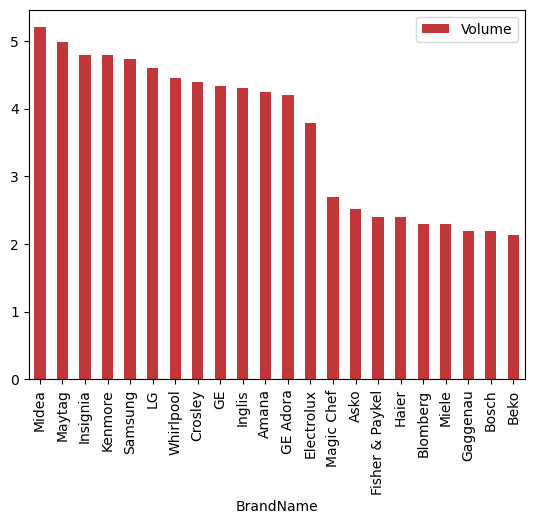

In [30]:
import seaborn as sns
sns.set_palette('RdBu')
washers.groupby('BrandName')[['Volume']].mean().sort_values(by='Volume',ascending=False).plot.bar()